# Model Evaluations and Predictions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the model

In [3]:
model = load_model('binary_model.h5')

In [4]:
# load the test set for prediction
test_dir = 'Face Mask Dataset/Test'
image_gen = ImageDataGenerator(rescale=1./255)
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=80,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')
prediction = model.predict_classes(test_generator)
y_true = test_generator.labels

Found 992 images belonging to 2 classes.


## Evaluation on model

In [5]:
confusion_matrix(y_true, prediction)

array([[478,   5],
       [  2, 507]])

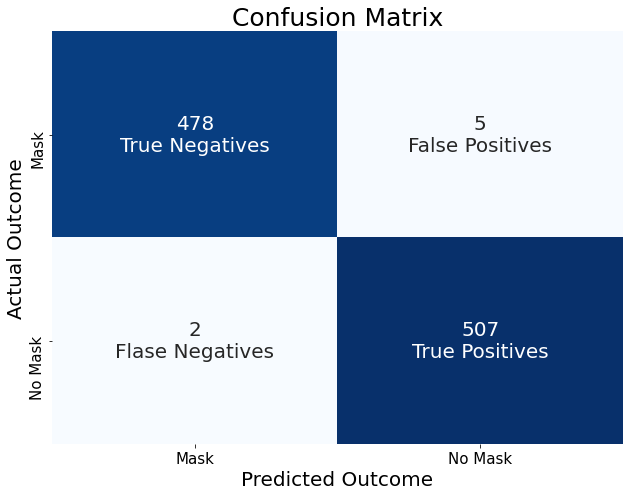

In [6]:
# plotting confusion matrix
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, prediction.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues",cbar=False)
cmlabels = ['True Negatives', "False Positives",
               'Flase Negatives', "True Positives"]
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Mask', 'No Mask']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

In [7]:
print(classification_report(y_true, prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       483
           1       0.99      1.00      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



## Prediction on unseen images

In [11]:
from keras.preprocessing import image
# file path
mask_file = 'Face Mask Dataset/Test/WithMask/190.png'
nomask_file = 'Face Mask Dataset/Test/WithoutMask/84.png'
test_mask_img = 'test_img/test_mask _1.jpg'
test_nomask_img = 'test_img/test_nomask_1.jpeg'

0: with mask <br>
1: without mask

In [5]:
def mask_detector(file, model):
    """
    The function returns the prediction of mask.
    
    parameters: 
        file: image file path 
        model: mask detector model
    
    output: 
        prediction: if the person has mask or not
        show image
    """
    img = image.load_img(file, target_size=(150,150))
    new_img = image.img_to_array(img)
    new_img = np.expand_dims(new_img, axis=0)
    new_img = new_img/255
    
    labels = {0:"Mask", 1:"No Mask"}
    prediction_class = model.predict_classes(new_img)[0][0]
    prediction = labels[prediction_class]
    
    print(f'the person has {prediction}')
    plt.imshow(img)

the person has Mask


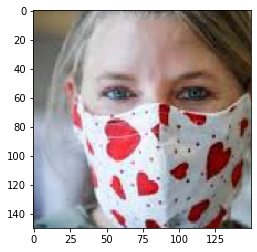

In [6]:
mask_detector(mask_file, model)

the person has No Mask


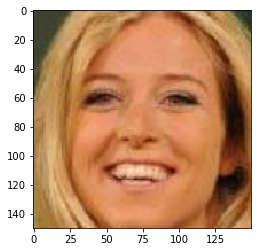

In [7]:
mask_detector(nomask_file, model)

the person has Mask


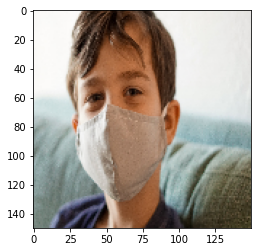

In [12]:
mask_detector(test_mask_img, model)

the person has No Mask


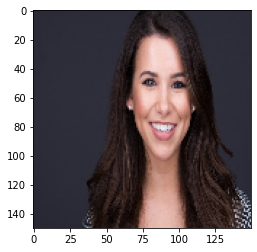

In [13]:
mask_detector(test_nomask_img, model)

the person has No Mask


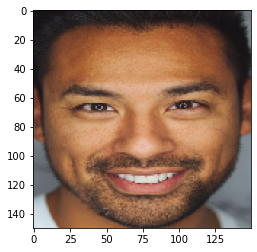

In [15]:
mask_detector("test_img/test_nomask_2.png", model)

the person has Mask


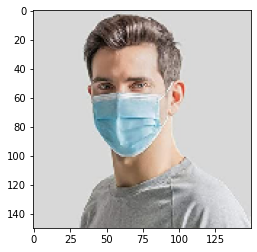

In [16]:
mask_detector("test_img/test_mask_2.jpg", model)

the person has No Mask


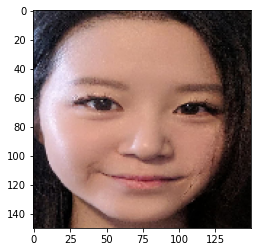

In [17]:
mask_detector("test_img/test_nomask_3.png", model)